#### TDOP

- TDOP(Trade Density Over Price) 는 각 가격의 날짜별 density에 시간 가중치를 두어 합산한 값

In [5]:
%matplotlib inline
import sys, os
sys.path.append('../../')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from tools import open_file, load_products, dataframe
from datetime import datetime, timedelta
from tools import TDOP
from tools.instruments import instruments
import h5py

### 0. Load data

In [6]:
DBPATH = os.path.join('..','..','data','tdop')

In [7]:
density_file = os.path.join(DBPATH,'density.hdf')
density = h5py.File(density_file, 'r') #density table

### 1. Generate TDOPS

In [11]:
decayfactor = 50
tdopfilepath = os.path.join(DBPATH, f'tdop_decay_{decayfactor}.hdf')
tdopfile = h5py.File(tdopfilepath, 'w')

In [12]:
length = len(density)
for cnt, symbol in enumerate(list(density)):
    #if symbol != 'AD':
    #    continue
    P = instruments[symbol]
    #for ohlc in raw_daily.values():
    #    if ohlc.attrs['symbol'] == symbol:
    #        dateindex = ohlc.value[:,0].astype('M8[s]')
    
    #dates = density[symbol][:,0]#P.quotes().index.astype('M8[s]')
    
    print('\r processing: %s (%s/%s)                             '%(symbol,cnt,length), end='', flush=True)
    x, priceindex, values, dates = TDOP.get_factors(density[symbol][:], P)
    #dates = []
    prices = []
    tdops = []
    dateindex = np.unique(dates) 
    for now in dateindex:
        print(f"\rprocessing: {symbol} at {now} ({cnt}/{length})                        ", end='', flush=True)
        #x, y, date = create_tdop(grp.Density, pinfo, decayfactor=1, now=now, period=2)
        y = TDOP.create_tdop(priceindex, values, dates, now=now, period=None, decayfactor=decayfactor)
        #dates.append(now)
        tdops.append(y)
    #dates = dates.astype('int64')
    prices = np.array(x)
    tdops = np.array(tdops)
    
    group = tdopfile.create_group(symbol)
    group.create_dataset("dates", dateindex.shape, data=dateindex.astype('int64'))
    group.create_dataset("prices", prices.shape, data=prices)
    group.create_dataset("tdop", tdops.shape, data=tdops, compression="gzip")
    tdopfile.flush()

processing: W at 2022-05-04T00:00:00 (39/40)                          

In [13]:
tdopfile.close()

### Verification

In [51]:
tdopfile = h5py.File(tdopfilepath, 'r')

In [55]:
a=tdopfile['AD']

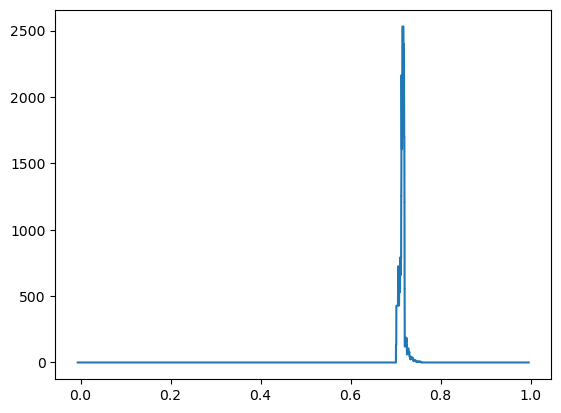

In [60]:
plt.plot(a['prices'][:],a['tdop'][-100])
#plt.axes().set_xlim([1000,4000])

In [61]:
tdopfile.close()

In [55]:
for gp in raw_density.iter_nodes('/'):
    print(gp._v_name)

AD
BP
CC
CD
CL
CT
DX
ED
FBTP
FDAX
FESX
FGBL
FGBM
FGBS
GC
HG
HO
JY
KC
LC
LCO
LGO
LH
NE
NG
NKD
OJ
PA
PL
SB
SF
SI
URO
WTCL
ZB
ZC
ZF
ZL
ZM
ZN
ZO
ZR
ZS
ZT
ZW


In [29]:
df = pd.DataFrame(density['AD'[:]])
df.columns = ['date','price','value']
df['date'] = df['date'].astype('datetime64[s]')

In [35]:
df[['price','value']].groupby('price').sum()

,value
price,
-0.00640,15.890110
-0.00635,15.890110
-0.00630,15.890110
-0.00625,15.890110
-0.00620,15.890110
...,...
0.99555,592.107784
0.99560,592.107784
0.99565,592.107784


In [53]:
df['price'].unique()[99:110]

array([ 0.01175, -0.0064 , -0.00635, -0.0063 , -0.00625, -0.0062 ,
       -0.00615, -0.0061 , -0.00605, -0.006  , -0.00595])

<AxesSubplot: >

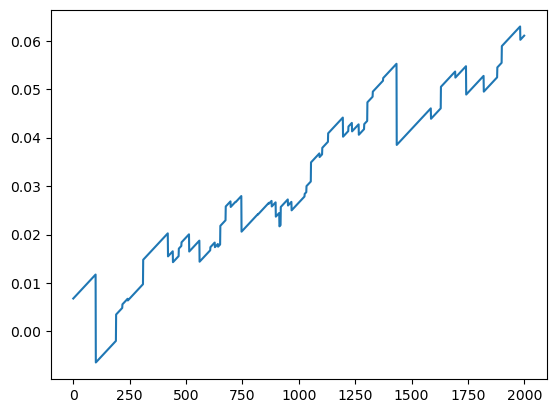

In [51]:
df.price.iloc[:2000].plot()

In [44]:
np.where(df.price.min()==df.price)

(array([100], dtype=int64),)

In [47]:
df.iloc[90:110]

,date,price,value
90,1987-01-13,0.01130,18.356436
91,1987-01-13,0.01135,18.356436
92,1987-01-13,0.01140,18.356436
93,1987-01-13,0.01145,18.356436
94,1987-01-13,0.01150,18.356436
95,1987-01-13,0.01155,18.356436
96,1987-01-13,0.01160,18.356436
97,1987-01-13,0.01165,18.356436
98,1987-01-13,0.01170,18.356436
99,1987-01-13,0.01175,18.356436
